<a href="https://colab.research.google.com/github/nzungizelab/Genomic-Surveillance-Malaria-Vectors_Africa/blob/NzungizeL/Workshop_4_Module_3_and_Module_4_Ancestry_informative_markers_(AIMs).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Workshop 4 : Module 3 - Ancestry-informative markers** [here](https://anopheles-genomic-surveillance.github.io/workshop-4/module-3-aims.html)

In [ ]:
#load data
!pip install -q --no-warn-conflicts malariagen_data

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.9/130.9 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 42.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 122.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 124.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 121.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.5/302.5 kB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 124.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.0/137.0 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 110.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 133.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.1/206.1 kB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
#Import libraries
import malariagen_data
import numpy as np
import allel

In [ ]:
#Configure access to MalariaGEN data in Google Cloud.
ag3 = malariagen_data.Ag3()
ag3

<MalariaGEN Ag3 API client>
Storage URL             : gs://vo_agam_release/
Data releases available : 3.0
Results cache           : None
Cohorts analysis        : 20230516
AIM analysis            : 20220528
Site filters analysis   : dt_20200416
Software version        : malariagen_data 7.11.0
Client location         : Iowa, US
---
Please note that data are subject to terms of use,
for more information see https://www.malariagen.net/data
or contact data@malariagen.net. For API documentation see 
https://malariagen.github.io/vector-data/ag3/api.html

In [ ]:
#Accessing AIM data
#Let’s access the genotypes for the gambcolu_vs_arab AIMs for sample set AG1000G-UG (Uganda).
ds_aim = ag3.aim_calls(aims="gambcolu_vs_arab", sample_sets="AG1000G-UG")
ds_aim

<xarray.Dataset>
Dimensions:           (variants: 2612, samples: 290, ploidy: 2, alleles: 2)
Coordinates:
    sample_id         (samples) <U24 dask.array<chunksize=(290,), meta=np.ndarray>
    variant_contig    (variants) uint8 dask.array<chunksize=(2612,), meta=np.ndarray>
    variant_position  (variants) int32 dask.array<chunksize=(2612,), meta=np.ndarray>
Dimensions without coordinates: variants, samples, ploidy, alleles
Data variables:
    call_genotype     (variants, samples, ploidy) int8 dask.array<chunksize=(1306, 145, 2), meta=np.ndarray>
    variant_allele    (variants, alleles) |S1 dask.array<chunksize=(2612, 2), meta=np.ndarray>
Attributes:
    aims:      gambcolu_vs_arab
    analysis:  20220528
    contigs:   ['2R', '2L', '3R', '3L', 'X']

In [ ]:
#How many AIMs are there on each of the chromosome arms?
aim_contig = ds_aim["variant_contig"].values
contigs = ds_aim.attrs["contigs"]
for i, contig in enumerate(contigs):
    print(f"{contig}: {np.count_nonzero(aim_contig == i)}")


#Note that there are 2,612 variants. This is the number of AIM SNPs. These include SNPs from all five chromosome arms.


2R: 734
2L: 485
3R: 542
3L: 363
X: 488


In [ ]:
# 2R+2L+3R+3L+X
x= 734+485+542+363+488
x

2612

In [ ]:
# the AIM alleles
#This is a 2-D NumPy array of nucleotides (i.e., SNP alleles). and Each row is a SNP
#the first column gives the allele usually found in An. gambiae and An. coluzzii,
#the second column gives the allele usually found in An. arabiensis.
aim_alleles = ds_aim["variant_allele"].values
aim_alleles

array([[b'C', b'A'],
       [b'A', b'T'],
       [b'C', b'T'],
       ...,
       [b'A', b'T'],
       [b'T', b'A'],
       [b'T', b'C']], dtype='|S1')

In [ ]:
#Let’s access the AIM genotypes.
aim_gt = ds_aim["call_genotype"].values
aim_gt.shape

#This is a 3-D NumPy array of genotype calls, with 2,612 variants and 290 diploid samples.

(2612, 290, 2)

In [ ]:
#Let’s take a peek at the genotypes for the first sample:
aim_gt[:, 0]

#Here a [1, 1] genotype call means homozygous for the An. arabiensis allele.

array([[1, 1],
       [1, 1],
       [1, 1],
       ...,
       [1, 1],
       [1, 1],
       [1, 1]], dtype=int8)

In [ ]:
#Now take a peek at the genotypes for the 100th sample:
aim_gt[:, 99]

#Here a [0, 0] genotype call means homozygous for the allele found in An. gambiae and An. coluzzii.

array([[0, 0],
       [0, 0],
       [0, 0],
       ...,
       [0, 0],
       [0, 0],
       [0, 0]], dtype=int8)

**Let’s access the genotypes for the gamb_vs_colu AIMs for sample set AG1000G-CF (Central African Republic).**

In [ ]:
#gamb_vs_colu
ds_aim1 = ag3.aim_calls(aims="gamb_vs_colu", sample_sets="AG1000G-CF")
ds_aim1

<xarray.Dataset>
Dimensions:           (variants: 700, samples: 73, ploidy: 2, alleles: 2)
Coordinates:
    sample_id         (samples) <U24 dask.array<chunksize=(73,), meta=np.ndarray>
    variant_contig    (variants) uint8 dask.array<chunksize=(700,), meta=np.ndarray>
    variant_position  (variants) int64 dask.array<chunksize=(700,), meta=np.ndarray>
Dimensions without coordinates: variants, samples, ploidy, alleles
Data variables:
    call_genotype     (variants, samples, ploidy) int8 dask.array<chunksize=(700, 73, 2), meta=np.ndarray>
    variant_allele    (variants, alleles) |S1 dask.array<chunksize=(700, 2), meta=np.ndarray>
Attributes:
    aims:      gamb_vs_colu
    analysis:  20220528
    contigs:   ['2R', '2L', '3R', '3L', 'X']

*   Note that there are less AIMs here, 700 in total.
*   That’s because An. gambiae and An. coluzzii are less genetically diverged,
*   so there are fewer SNPs which are sufficiently differentiated to use as AIMs.

In [ ]:
#How many AIMs are there on each of the chromosome arms?
aim_contig = ds_aim1["variant_contig"].values
contigs = ds_aim1.attrs["contigs"]
for i, contig in enumerate(contigs):
    print(f"{contig}: {np.count_nonzero(aim_contig == i)}")

#Note here many AIMs are located on the X chromosome.

2R: 54
2L: 92
3R: 48
3L: 24
X: 482


In [ ]:
#Let’s peek at the alleles.
ds_aim["variant_allele"].values

array([[b'C', b'A'],
       [b'A', b'T'],
       [b'C', b'T'],
       ...,
       [b'A', b'T'],
       [b'T', b'A'],
       [b'T', b'C']], dtype='|S1')

*  The first column gives the gambiae alleles, and
*  The second column gives the coluzzii alleles.


In [ ]:
#Finally, let’s peek at the genotype calls.
aim_gt = ds_aim["call_genotype"].values

In [ ]:
#Here’s the first sample:
aim_gt[:, 0]

#Here a [0, 0] genotype call means homozygous for the allele found in An. gambiae.

array([[1, 1],
       [1, 1],
       [1, 1],
       ...,
       [1, 1],
       [1, 1],
       [1, 1]], dtype=int8)

In [ ]:
#Here’s the 21st sample:
aim_gt[:, 20]

#Here a [1, 1] genotype call means homozygous for the allele found in An. coluzzii.

array([[1, 1],
       [1, 1],
       [1, 1],
       ...,
       [1, 1],
       [1, 1],
       [1, 1]], dtype=int8)

**Visualising and interpreting AIMs**

In [ ]:
#make a plot to visualise the AIM genotypes for some sample of interes
#which will allow us to see the data for all AIMs and all samples at once
#We will use the function plot_aim_heatmap().

ag3.plot_aim_heatmap(aims="gamb_vs_colu", sample_sets="AG1000G-CF") #Central African Republic

#Here there is a clear distinction between An. gambiae and An. coluzzii.

In [ ]:
#Malawi
ag3.plot_aim_heatmap(aims="gambcolu_vs_arab", sample_sets="AG1000G-MW")

#Here all samples are An. arabiensis.

In [ ]:
#what would happen if we tried to use the gamb_vs_colu AIMs with some An. arabiensis samples?
ag3.plot_aim_heatmap(aims="gamb_vs_colu", sample_sets="AG1000G-MW")

#Note the stripy pattern - the gamb_vs_colu AIMs are not appropriate to use with An. arabiensis.

In [ ]:
#Uganda
ag3.plot_aim_heatmap(aims="gambcolu_vs_arab", sample_sets="AG1000G-UG")

#Here there is a clear distinction between gambiae (gambcolu) and arabiensis, with one F1 hybrid individual.

In [ ]:
#Burkina Faso
ag3.plot_aim_heatmap(aims="gamb_vs_colu", sample_sets="AG1000G-BF-A")

#Here there is a clear distinction between An. gambiae and An. coluzzii, but with introgression from gambiae into coluzzii on chromosome arm 2L.

In [ ]:
#Guinea-Bissau
#Firstly, confirm there are no An. arabiensis.
ag3.plot_aim_heatmap(aims="gambcolu_vs_arab", sample_sets="AG1000G-GW")


In [ ]:
#Lets examine gamb_vs_colu AIMs.
ag3.plot_aim_heatmap(aims="gamb_vs_colu", sample_sets="AG1000G-GW")

#Here there are samples with lots of mixed and heterozygous AIMs.
#There could be several possible explanations for this. We will investigate further in the next module.

**Exercise 1_Guinea**

In [ ]:
# Guinea
#run the plot of gambiae versus coluzzii AIMs for the AG1000G-GN-B sample set from Guinea
ag3.plot_aim_heatmap(aims="gamb_vs_colu", sample_sets="AG1000G-GN-B")



In [ ]:
#gambiae versus arabiensis AIMs for the AG1000G-GN-B sample set from Guinea
ag3.plot_aim_heatmap(aims="gambcolu_vs_arab", sample_sets="AG1000G-GW")

In [ ]:
#find sample AV0241-C (hint: it’s the first row)
#gamb_vs_colu
ds_aim2 = ag3.aim_calls(aims="gamb_vs_colu", sample_sets="AG1000G-GN-B")
ds_aim2

<xarray.Dataset>
Dimensions:           (variants: 700, samples: 185, ploidy: 2, alleles: 2)
Coordinates:
    sample_id         (samples) <U24 dask.array<chunksize=(185,), meta=np.ndarray>
    variant_contig    (variants) uint8 dask.array<chunksize=(700,), meta=np.ndarray>
    variant_position  (variants) int64 dask.array<chunksize=(700,), meta=np.ndarray>
Dimensions without coordinates: variants, samples, ploidy, alleles
Data variables:
    call_genotype     (variants, samples, ploidy) int8 dask.array<chunksize=(350, 185, 2), meta=np.ndarray>
    variant_allele    (variants, alleles) |S1 dask.array<chunksize=(700, 2), meta=np.ndarray>
Attributes:
    aims:      gamb_vs_colu
    analysis:  20220528
    contigs:   ['2R', '2L', '3R', '3L', 'X']

*   the AIMs in total is 700 from 185 samples

In [ ]:
#How many AIMs are there on each of the chromosome arms?  using AG1000G-GN-B sample set from Guinea
aim_contig2 = ds_aim2["variant_contig"].values
contigs2 = ds_aim2.attrs["contigs"]
for i, contig in enumerate(contigs2):
    print(f"{contig}: {np.count_nonzero(aim_contig2 == i)}")

2R: 54
2L: 92
3R: 48
3L: 24
X: 482


In [ ]:
#Let’s peek at the alleles.
ds_aim2["variant_allele"].values

# first column gives the gambiae alleles, and the second column gives the coluzzii alleles.

array([[b'C', b'A'],
       [b'G', b'A'],
       [b'T', b'A'],
       ...,
       [b'G', b'A'],
       [b'T', b'G'],
       [b'T', b'A']], dtype='|S1')

In [ ]:
# let’s peek at the genotype calls.
aim_gt2 = ds_aim2["call_genotype"].values

In [ ]:
#the first sample:
aim_gt2[:, 0]

array([[0, 0],
       [0, 0],
       [0, 0],
       ...,
       [0, 0],
       [0, 0],
       [0, 0]], dtype=int8)

*   [0, 0] genotype call means homozygous for the allele found in An. gambiae.




In [ ]:
#the 21st sample
aim_gt2[:, 20]

array([[0, 0],
       [0, 0],
       [0, 0],
       ...,
       [0, 0],
       [0, 0],
       [0, 0]], dtype=int8)

In [ ]:
#find sample AV0241-C
sample_meta_df.query("sample_id == 'AV0241-C'")[["sample_id"] + aim_columns]

sample_id  aim_species_fraction_arab  aim_species_fraction_colu  \
1733  AV0241-C                    0.00134                   0.989957   

      aim_species_fraction_colu_no2l aim_species_gambcolu_arabiensis  \
1733                        0.989256                        gambcolu   

     aim_species_gambiae_coluzzii aim_species  
1733                     coluzzii    coluzzii

**Summarising AIMs and making a provisional species assignment**

In [ ]:
#Let’s take a look at the AIM columns in the sample metadata for the AG1000G-CF sample set.
df_samples = ag3.sample_metadata(sample_sets="AG1000G-CF")
df_samples[["sample_id", "aim_species_fraction_arab", "aim_species_fraction_colu", "aim_species_fraction_colu_no2l", "aim_species"]]

sample_id  aim_species_fraction_arab  aim_species_fraction_colu  \
0    BK0001-C                   0.002299                   0.014306   
1    BK0002-C                   0.001342                   0.962089   
2    BK0003-C                   0.001342                   0.969914   
3    BK0005-C                   0.002874                   0.016440   
4    BK0006-C                   0.000958                   0.966284   
..        ...                        ...                        ...   
68   BK0082-C                   0.001727                   0.010745   
69   BK0083-C                   0.003063                   0.011445   
70   BK0085-C                   0.002106                   0.012894   
71   BK0086-C                   0.001532                   0.009312   
72  BK0094-CW                   0.002492                   0.028653   

    aim_species_fraction_colu_no2l aim_species  
0                         0.016474     gambiae  
1                         0.957990    coluzzii  
2                         0.966172    coluzzii  
3                         0.018107     gambiae  
4                         0.963696    coluzzii  
..                             ...         ...  
68                        0.009061     gambiae  
69                        0.012356     gambiae  
70                        0.013201     gambiae  
71                        0.010726     gambiae  
72                        0.032178     gambiae  

[73 rows x 5 columns]

*   *aim_species_fraction_arab* is the fraction of arabiensis alleles in genotypes at the gambcolu_vs_arab AIMs.

*   *aim_species_fraction_col*u is the fraction of coluzzii alleles in genotypes at the gamb_vs_colu AIMs.

*   *aim_species_fraction_colu_no2l column*, which is the fraction of coluzzii alleles in genotypes at the gamb_vs_colu AIMs, excluding chromosome arm 2L. Because we know that many countries have been affected by the adaptive introgression event on chromosome arm 2L, it is sometimes useful to exclude it to get a clearer picture of species ancestry.

In [ ]:
# make a provisional species assignment, and store the result in the aim_species column.
df_samples.groupby("aim_species").size()

aim_species
coluzzii    18
gambiae     55
dtype: int64

In [ ]:
#let’s make some scatter plots of the AIM fractions.
def plot_aim_fractions(
    sample_sets=None,
    sample_query=None,
    x="aim_species_fraction_arab",
    y="aim_species_fraction_colu_no2l",
):

    import plotly.express as px

    # load sample metadata
    df = ag3.sample_metadata(sample_sets=sample_sets, sample_query=sample_query)

    # set up colours
    palette = px.colors.qualitative.T10
    color_map = {
        "arabiensis": palette[4],
        "gambiae": palette[0],
        "coluzzii": palette[2],
        "intermediate_gambcolu_arabiensis": palette[5],
        "intermediate_gambiae_coluzzii": palette[6],
    }

    # make a scatter plot
    fig = px.scatter(
        data_frame=df,
        x=x,
        y=y,
        width=500,
        height=500,
        range_x=[-.05, 1.05],
        range_y=[-.05, 1.05],
        hover_data={
            "aim_species_fraction_arab": ":.2f",
            "aim_species_fraction_colu": ":.2f",
            "aim_species_fraction_colu_no2l": ":.2f",
            "sample_id": True,
            "aim_species": True,
        },
        title=sample_sets,
        color="aim_species",
        color_discrete_map=color_map,
        category_orders={"aim_species": list(color_map)},
    )

    # add thresholds used for AIM species calling
    arab_cutoff = 0.85
    gambcolu_cutoff = 0.1
    colu_cutoff = 0.9
    gamb_cutoff = 0.1
    fig.add_vline(x=arab_cutoff, line_dash="dash")
    fig.add_vline(x=gambcolu_cutoff, line_dash="dash")
    fig.add_shape(
        type="line",
        x0=-.05, x1=gambcolu_cutoff, y0=gamb_cutoff, y1=gamb_cutoff,
        line_dash="dash",
    )
    fig.add_shape(
        type="line",
        x0=-.05, x1=gambcolu_cutoff, y0=colu_cutoff, y1=colu_cutoff,
        line_dash="dash",
    )

    # visual styling
    fig.update_layout(showlegend=False)
    fig.update_traces(
        marker=dict(
            size=7,
            line=dict(
                width=1,
                color='black'
            )
        ),
        selector=dict(mode='markers')
    )

    return fig


In [ ]:
plot_aim_fractions(sample_sets="AG1000G-CF")

**We can see two clearly separated groups of markers.**

*   In the bottom left are samples with fraction arabiensis AIMs near 0, and fraction coluzzii AIMs near 0. We can provisionally assign these as An. gambiae.
*   In the top left are samples with fraction arabiensis AIMs near 0, and fraction coluzzii AIMs near 1. We can provisionally assign these as An. coluzzii.

*   If you hover over the markers, you’ll see the provisional species assignment in the “aim_species” field.


In [ ]:
#Let’s look at another example - Uganda.
plot_aim_fractions(sample_sets="AG1000G-UG")

**Here we have three clusters:**

*   On the right are samples with fraction arabiensis AIMs near 1. We provisionally assign these An. arabiensis.

*   In the bottom left are samples with fraction arabiensis AIMs near 0, and fraction coluzzii AIMs near 0. We can provisionally assign these as An. gambiae.

*   In the middle is one sample with fraction arabiensis AIMs near 0.5. This is probably an F1 hybrid between gambiae and arabiensis parents. We provisionally assign this “intermediate_gambcolu_arabiensis”.

In [ ]:
#Let’s look at Guinea-Bissau.
plot_aim_fractions(sample_sets="AG1000G-GW")

Here there are a few samples in the bottom left corner which we provisionally assign as An. gambiae, but most samples occur somewhere in the middle with fraction coluzzii AIMs between 0 and 1. These need further investigation.

In [ ]:
#Let’s look at AG1000G-GN-B sample set from Guinea
plot_aim_fractions(sample_sets="AG1000G-GN-B")

In [ ]:
#Let’s look at AG1000G-GN-B sample set from Guinea
plot_aim_fractions(sample_sets="AG1000G-KE")

**Module 4 - Discovering cryptic taxa** [here](https://anopheles-genomic-surveillance.github.io/workshop-4/module-4-taxon-analysis.html)

In [ ]:
#load data
!pip install -q --no-warn-conflicts malariagen_data

In [ ]:
import malariagen_data
import os

In [ ]:
 #Mount your Google Drive - you will need to follow the authorization instructions.
 try:
    # if running on colab, mount Google drive
    from google.colab import drive
    drive.mount('drive')
except ImportError:
    pass

Mounted at drive


In [ ]:
#With our Google Drive now mounted, we can define and make a directory where we want to save our results.
results_dir = 'drive/MyDrive/Colab Data/module_4_results'
os.makedirs(results_dir, exist_ok=True)

*   In Google Colab, we can actually see our mounted drive and results directory by clicking on the file tab on the left hand side of the screen.
*   Next we should setup the malariagen_data package. As we want to save our reults in the Google Drive folder
*   we’ll use the results_cache parameter and assign our results directory to it.
*  If we were running this notebook locally, then we could assign a local folder to this parameter and the results would instead get stored on our hard drive.

In [ ]:
ag3 = malariagen_data.Ag3(results_cache=results_dir)
ag3

<MalariaGEN Ag3 API client>
Storage URL             : gs://vo_agam_release/
Data releases available : 3.0
Results cache           : /content/drive/MyDrive/Colab Data/module_4_results
Cohorts analysis        : 20230516
AIM analysis            : 20220528
Site filters analysis   : dt_20200416
Software version        : malariagen_data 7.11.0
Client location         : Iowa, US
---
Please note that data are subject to terms of use,
for more information see https://www.malariagen.net/data
or contact data@malariagen.net. For API documentation see 
https://malariagen.github.io/vector-data/ag3/api.html

Remember to check **Client location** in the output above - our cloud data is stored in the US, so want our Google Colab virtual machine (VM) to be based in the US too. If your client location is somewhere else in the world, select **Runtime** then **Disconnect and delete runtime** from the toolbar at the top of notebook, then rerun the notebook from the top. This will ensure our analyses run as fast as possible.

**Step 1 - Ancestry informative marker (AIM) analysis**

In [ ]:
#Let’s remind ourselves of what the sample metadata looks like.
sample_meta_df = ag3.sample_metadata()
sample_meta_df.head()


sample_id partner_sample_id contributor country location  year  month  \
0  AR0047-C            LUA047  Joao Pinto  Angola   Luanda  2009      4   
1  AR0049-C            LUA049  Joao Pinto  Angola   Luanda  2009      4   
2  AR0051-C            LUA051  Joao Pinto  Angola   Luanda  2009      4   
3  AR0061-C            LUA061  Joao Pinto  Angola   Luanda  2009      4   
4  AR0078-C            LUA078  Joao Pinto  Angola   Luanda  2009      4   

   latitude  longitude sex_call  ... admin1_name admin1_iso  admin2_name  \
0    -8.884     13.302        F  ...      Luanda     AO-LUA       Luanda   
1    -8.884     13.302        F  ...      Luanda     AO-LUA       Luanda   
2    -8.884     13.302        F  ...      Luanda     AO-LUA       Luanda   
3    -8.884     13.302        F  ...      Luanda     AO-LUA       Luanda   
4    -8.884     13.302        F  ...      Luanda     AO-LUA       Luanda   

      taxon  cohort_admin1_year  cohort_admin1_month cohort_admin1_quarter  \
0  coluzzii    AO-LUA_colu_2009  AO-LUA_colu_2009_04   AO-LUA_colu_2009_Q2   
1  coluzzii    AO-LUA_colu_2009  AO-LUA_colu_2009_04   AO-LUA_colu_2009_Q2   
2  coluzzii    AO-LUA_colu_2009  AO-LUA_colu_2009_04   AO-LUA_colu_2009_Q2   
3  coluzzii    AO-LUA_colu_2009  AO-LUA_colu_2009_04   AO-LUA_colu_2009_Q2   
4  coluzzii    AO-LUA_colu_2009  AO-LUA_colu_2009_04   AO-LUA_colu_2009_Q2   

        cohort_admin2_year         cohort_admin2_month  \
0  AO-LUA_Luanda_colu_2009  AO-LUA_Luanda_colu_2009_04   
1  AO-LUA_Luanda_colu_2009  AO-LUA_Luanda_colu_2009_04   
2  AO-LUA_Luanda_colu_2009  AO-LUA_Luanda_colu_2009_04   
3  AO-LUA_Luanda_colu_2009  AO-LUA_Luanda_colu_2009_04   
4  AO-LUA_Luanda_colu_2009  AO-LUA_Luanda_colu_2009_04   

        cohort_admin2_quarter  
0  AO-LUA_Luanda_colu_2009_Q2  
1  AO-LUA_Luanda_colu_2009_Q2  
2  AO-LUA_Luanda_colu_2009_Q2  
3  AO-LUA_Luanda_colu_2009_Q2  
4  AO-LUA_Luanda_colu_2009_Q2  

[5 rows x 30 columns]

In [ ]:
#There are several columns in the metadata which provide data on AIMs. Let’s take a look.
aim_columns = [c for c in sample_meta_df if c.startswith("aim_")]
aim_columns

['aim_species_fraction_arab',
 'aim_species_fraction_colu',
 'aim_species_fraction_colu_no2l',
 'aim_species_gambcolu_arabiensis',
 'aim_species_gambiae_coluzzii',
 'aim_species']

In [ ]:
sample_meta_df[["sample_id"] + aim_columns].head()

sample_id  aim_species_fraction_arab  aim_species_fraction_colu  \
0  AR0047-C                   0.000958                   0.856734   
1  AR0049-C                   0.000767                   0.821967   
2  AR0051-C                   0.000766                   0.825899   
3  AR0061-C                   0.001724                   0.827187   
4  AR0078-C                   0.000574                   0.816224   

   aim_species_fraction_colu_no2l aim_species_gambcolu_arabiensis  \
0                        0.945545                        gambcolu   
1                        0.935484                        gambcolu   
2                        0.938640                        gambcolu   
3                        0.940100                        gambcolu   
4                        0.928867                        gambcolu   

  aim_species_gambiae_coluzzii aim_species  
0                     coluzzii    coluzzii  
1                     coluzzii    coluzzii  
2                     coluzzii    coluzzii  
3                     coluzzii    coluzzii  
4                     coluzzii    coluzzii

 **“aim_species” ** column - this has the value of our provisional species call made from looking at AIM genotype calls. Let’s see all the values this can take:

In [ ]:
sample_meta_df.groupby("aim_species").size()

aim_species
arabiensis                           368
coluzzii                             751
gambiae                             1613
intermediate_gambcolu_arabiensis       1
intermediate_gambiae_coluzzii        348
dtype: int64

To visualise the AIM calls as a heatmap we just need to specify which set of markers we want to use (**aims**), either “gambcolu_vs_arab” or “gamb_vs_colu”. There’s also a **sample_set** parameter and a **sample_query** parameter to select which samples to look at.

In [ ]:
#Let’s look again at the “gamb_vs_colu” AIMs from the “AG1000G-BF-A” sample set of mosquitoes from Burkina Faso.
ag3.plot_aim_heatmap(
    aims="gamb_vs_colu",
    sample_sets="AG1000G-BF-A"
)

**In the plot above, **
*   the subplots represent different contigs (chromosome arms) and
*   the rows are individual samples.
*   These plots are interactive and hovering the mouse pointer brings up data about the AIM variant index (column), mosquito sample ID (row), and AIM genotype (here 0 means homozygous gamb/gamb, 1 means heterozygous gamb/colu and 2 means homozygous colu/colu).


**gamb_vs_colu plot **

*   blue represents homozygous An. gambiae genotypes
*   red represents homozygous An. coluzzii genotypes
*   yellow we see genotypes that are heterozygous for the gambiae and coluzzii alleles.

In [ ]:
# the provisional assignments for this sample set:
sample_meta_df.query("sample_set == 'AG1000G-BF-A'").groupby("aim_species").size()

aim_species
coluzzii                         82
gambiae                          98
intermediate_gambiae_coluzzii     1
dtype: int64

In [ ]:
#Let’s look at another AIM plot, using the “gambcolu_vs_arab” AIMs to look at mosquitoes from Uganda.
ag3.plot_aim_heatmap(
    aims="gambcolu_vs_arab",
    sample_sets="AG1000G-UG"
)

**gambcolu_vs_arab**

*   Green represents genotypes which are homozygous for the An. arabiensis allele
*   Purple represents genotypes homozygous for the allele found in An. gambiae and An. coluzzii
*   Yellow we again see genotypes that are heterozygous.

*   the AIMs are not 100% informative due to how they have been obtained (see module 3)  we can see lots of samples where most of the AIMs are homozygous for one species. This what we expected, as these samples should belong to one of these known taxa.



In [ ]:
# We can see a sample like this (ACO198-C) in the Uganda plot above
sample_meta_df.query("sample_id == 'AC0198-C'")[["sample_id"] + aim_columns]

sample_id  aim_species_fraction_arab  aim_species_fraction_colu  \
2682  AC0198-C                   0.494832                   0.211288   

      aim_species_fraction_colu_no2l aim_species_gambcolu_arabiensis  \
2682                          0.2075                    intermediate   

     aim_species_gambiae_coluzzii                       aim_species  
2682                          NaN  intermediate_gambcolu_arabiensis

In [ ]:
#counts of the different AIM species assignments in Uganda:
sample_meta_df.query("sample_set == 'AG1000G-UG'").groupby("aim_species").size()

aim_species
arabiensis                           82
gambiae                             207
intermediate_gambcolu_arabiensis      1
dtype: int64

In [ ]:
#There are other sample sets where there are multiple samples that do not have a clear species assignment,
#e.g., Guinea-Bissau.
ag3.plot_aim_heatmap(
    aims="gamb_vs_colu",
    sample_sets="AG1000G-GW"
)


In [ ]:
#In sample sets like this, there may be many “intermediate” AIM species assignments:
sample_meta_df.query("sample_set == 'AG1000G-GW'").groupby("aim_species").size()

aim_species
gambiae                          28
intermediate_gambiae_coluzzii    73
dtype: int64

Sample sets with many samples assigned a “intermediate” provisional species are flagged for further investigation with **principal component analysis (PCA).**

**Step 2 - Principal component analysis**

*   PCA can be used to identify genetic structure in a group of samples and we learnt why being able to detect structure is useful for genomic surveillance and vector control.
*   PCA is a method for reducing the dimensions of a dataset to help make interpreting the data easier.

In [ ]:
#Signals of hybridisation - Uganda
#the pca function documentation.
ag3.pca?

In [ ]:
#define some parameters to use in all the PCA computations.
region = "3L:15,000,000-41,000,000"
n_snps = 100_000

In [ ]:
#run a PCA with Ugandan samples
pca_df, evr = ag3.pca(
    region=region,
    n_snps=n_snps,
    sample_sets="AG1000G-UG"
)

Compute SNP allele counts:   0%|          | 0/1978 [00:00<?, ?it/s]

Load SNP genotypes:   0%|          | 0/2236 [00:00<?, ?it/s]

In [ ]:
#help
ag3.plot_pca_variance?

In [ ]:
##using the malariagen_data function plot_pca_variance().
ag3.plot_pca_variance(evr)

In [ ]:
#PCA data using the malariagen_data package.
ag3.plot_pca_coords?

In [ ]:
#just need to plug in our pca_df Pandas DataFrame
#using the “gambcolu_vs_arab” AIM derived provisional taxon data to help us interpret the plot.
ag3.plot_pca_coords(pca_df, color="aim_species")


*   Equidistant from the two species clusters, we can see a single sample - AC0198-C.
*   The AIM analysis defined this individual as being“intermediate_gambcolu_arabiensis” because it did not carry enough of either An. arabiensis or An. gambiae/coluzzi to be classified
*   The position of this sample, on the same axis of variation (PC1) as our two clusters of species suggests that this individual is a An. gambiae X An. arabiensis hybrid.

In [ ]:
#In this case (AG1000G-UG), we don’t need to alter our provisional AIM species assignments, and so the “taxon” column will be identical to “aim_species”.
sample_meta_df.query("sample_set == 'AG1000G-UG'").groupby(["aim_species", "taxon"]).size()

aim_species                       taxon     
arabiensis                        arabiensis     82
gambiae                           gambiae       207
intermediate_gambcolu_arabiensis  unassigned      1
dtype: int64

**Signals of cryptic species - Tanzania**

In [ ]:
#Let’s plot the “gamb_vs_colu” (An. gambiae vs An. coluzzii) AIMs for the Tanzanian sample set, excluding samples assigned as An. arabiensis.
ag3.plot_aim_heatmap(
    aims="gamb_vs_colu",
    sample_sets="AG1000G-TZ",
    sample_query="aim_species != 'arabiensis'"
)

#We can see that a number of samples show mixed ancestry (blue, red and yellow genotypes) over the 2 and 3 chromosomes, but appear homozygous for An. gambiae ancestry on the X chromosome.

In [ ]:

#Let’s investigate this sample set using PCA.
pca_df, evr = ag3.pca(
    region=region,
    n_snps=n_snps,
    sample_sets="AG1000G-TZ",
)

Compute SNP allele counts:   0%|          | 0/1978 [00:00<?, ?it/s]

Load SNP genotypes:   0%|          | 0/2236 [00:00<?, ?it/s]

In [ ]:
#plot the variance array to get an idea which principal components
ag3.plot_pca_variance(evr)

*   the explained variance doesn’t flatten out until PC4
*   List item



In [ ]:
#make multiple 2D scatter plots to investigate these three PCs e.g. PC1 vs. PC2 and PC2 vs. PC3.
#make one 3D scatter plot and visualise all three PCs together.
ag3.plot_pca_coords_3d(pca_df, x="PC1", y="PC2", z="PC3", color="aim_species")

**PC1**
The first principal component has separated all the “arabiensis from all other “aim_species”. This is what we might expect when we sample two species, due to reproductive isolation.

**PC2**
The second principal component has pulled all of the “intermediate_gambiae_coluzzii” samples as well as some “gambiae” samples away from all other samples. This is striking, the cluster that includes the intermediate samples is separated on its own axis of variation.

**PC3**
The third principal component splits two clusters of “gambiae” samples. If we look at the metadata attached to samples in these two clusters, we can see that in one cluster, samples were collected in Muleba and in the other, the samples were collected in Muheza. This looks like a classic case of geographic isolation between the An. gambiae populations from these two sites.

# **Geographical data and plot Maps for Tanzania and others sites**

In [ ]:
#load geographical data and plot maps
# https://github.com/googlecolab/colabtools/issues/85#issuecomment-709241391
!apt-get -q install libgdal-dev libproj-dev libgeos-dev proj-data proj-bin
!pip install -q cython numpy scipy pyshp matplotlib pandas malariagen_data
!pip uninstall -q -y shapely  # make sure we have a fresh install
!pip install -q shapely --no-binary shapely
!pip install -q --upgrade cartopy
!pip install -q --upgrade rasterio

In [ ]:
# check we have cartopy 0.18.0 or greater, needed to get tiles from google maps
import cartopy
cartopy.__version__

'0.21.1'

In [ ]:
#Setup access to MalariaGEN data via Google Cloud.
import malariagen_data
ag3 = malariagen_data.Ag3()
ag3

<MalariaGEN Ag3 API client>
Storage URL             : gs://vo_agam_release/
Data releases available : 3.0
Results cache           : None
Cohorts analysis        : 20230516
AIM analysis            : 20220528
Site filters analysis   : dt_20200416
Software version        : malariagen_data 7.11.0
Client location         : Iowa, US
---
Please note that data are subject to terms of use,
for more information see https://www.malariagen.net/data
or contact data@malariagen.net. For API documentation see 
https://malariagen.github.io/vector-data/ag3/api.html

In [ ]:
#The ecosystem classifications in full resolution are available from the USGS website (https://www.sciencebase.gov/catalog/item/63e4622ed34e9fa19a9c007a)
#these are large files and higher resolution than we need. For convenience we’ve precomputed a downsampled version of these data, let’s download it.
!wget --no-clobber https://storage.googleapis.com/vo_agam_release/reference/af_labeled_ecosys/Africa_IVC_20130316_final_MG_5pc.tif
!wget --no-clobber https://storage.googleapis.com/vo_agam_release/reference/af_labeled_ecosys/Africa_IVC_20130316_final_MG.tif.vat.csv

In [ ]:
#Data from the Malaria Atlas Project can be downloaded from their data explorer site (https://data.malariaatlas.org/maps?layers=Malaria:202206_Global_Pf_Parasite_Rate).
#Let’s download the most recent ITN coverage model.
!wget --no-clobber -O 2020_Africa_ITN_Use.zip "https://malariaatlas.org/geoserver/Explorer/ows?service=CSW&version=2.0.1&request=DirectDownload&ResourceId=Explorer:2020_Africa_ITN_Use"
!unzip -n -d 2020_Africa_ITN_Use 2020_Africa_ITN_Use.zip

In [ ]:
#Let’s also get data for country boundaries and physical features.
!wget --no-clobber https://raw.githubusercontent.com/SciTools/cartopy/master/tools/cartopy_feature_download.py
!python cartopy_feature_download.py physical --no-warn
!python cartopy_feature_download.py cultural --no-warn

In [ ]:
#Now let’s define some functions for loading the map data and plotting a map, with support for different background options.
from functools import lru_cache
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import rasterio
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.img_tiles import OSM, GoogleTiles
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# setup some geographical projections
crs_lonlat = ccrs.PlateCarree()
crs_mercator = ccrs.Mercator()

In [ ]:
@lru_cache(maxsize=None)
def load_ecosystems():
    """Load the African ecosystems data."""

    # build a matplotlib colour map from the colour table
    df_colors = pd.read_csv('Africa_IVC_20130316_final_MG.tif.vat.csv').set_index('Value')
    colors = np.zeros((df_colors.index.max() + 1, 3), dtype=float)
    for v, (r, g, b) in df_colors[['Red', 'Green', 'Blue']].iterrows():
        colors[int(v)] = r, g, b
    # fix the zero colour to be white
    colors[0] = 1, 1, 1
    cmap = mpl.colors.ListedColormap(colors)

    # load the image data
    image = rasterio.open("Africa_IVC_20130316_final_MG_5pc.tif")
    image_data = image.read(1)
    image_data = np.ma.masked_where(image_data < 0, image_data)

    # determine image extent
    extent = (
        image.bounds.left,
        image.bounds.right,
        image.bounds.bottom,
        image.bounds.top
    )

    return image_data, cmap, extent, crs_lonlat

In [ ]:
@lru_cache(maxsize=None)
def load_itn_coverage(year):
    """Load ITN coverage data for a given year."""

    image = rasterio.open(f"2020_Africa_ITN_Use/2020_GBD2021_Africa_ITN_Coverage_{year}.tif")
    image_data = image.read(1)
    image_data = np.ma.masked_where(image_data <= 0, image_data)
    cmap = "RdYlGn"
    extent = (
        image.bounds.left,
        image.bounds.right,
        image.bounds.bottom,
        image.bounds.top
    )
    return image_data, cmap, extent, crs_lonlat

In [ ]:
def plot_sites(extent=None, sample_sets="3.0", sample_query=None, background='osm',
               bgzoom=3, bgstyle='street', bgyear=2019, ax=None, figsize=(7, 7), gridlines=15,
               plot_kws=None, label_sites=False, title=None):
    """Plot a map of mosquito collection sites."""

    # normalise background parameter to lower case
    background = background.lower()

    if extent is None:
        # default to the whole of Africa
        extent = -26, 64, -35, 38

    # decide what projection to use
    if background in {'osm', 'google'}:
        # these backgrounds use Mercator projection and look best in their
        # native projection
        projection = ccrs.GOOGLE_MERCATOR
    else:
        # other backgrounds use Plate Carree, for simplicity use their
        # native projection
        projection = crs_lonlat

    # create a figure and axes to plot on
    if ax is None:
        fig = plt.figure(figsize=figsize, facecolor='w')
        ax = fig.add_subplot(111, projection=projection)

    # set the extent of the map
    ax.set_extent(extent, crs=crs_lonlat)

    # plot the background image

    if background == 'osm':
        # use OpenStreetMap as background
        imagery = OSM()
        ax.add_image(imagery, bgzoom)

    elif background == 'google':
        # use Google Maps as background
        imagery = GoogleTiles(style=bgstyle)
        ax.add_image(imagery, bgzoom)

    elif background == 'ecosystems':
        # use African Ecosystems as background
        image_data, image_cmap, image_extent, image_crs = load_ecosystems()
        ax.imshow(image_data, cmap=image_cmap,
                  interpolation='nearest', extent=image_extent,
                  origin='upper', transform=image_crs)
        if title is None:
            title = 'Ecosystems'

    elif background == 'itn_coverage':
        # use ITN coverage as background
        image_data, image_cmap, image_extent, image_crs = load_itn_coverage(bgyear)
        ax.imshow(image_data, cmap=image_cmap,
                  interpolation='nearest', extent=image_extent,
                  origin='upper', transform=image_crs)
        if title is None:
            title = f'ITN coverage ({bgyear})'

    if background in {"ecosystems", "itn_coverage"}:
        # add useful features
        ax.coastlines(resolution='50m', linewidth=1)
        ax.add_feature(cfeature.BORDERS, linewidth=1)

    if background == 'itn_coverage':
        ax.add_feature(cfeature.LAKES, linewidth=1)

    # draw gridlines
    if gridlines:
        gl = ax.gridlines(crs=crs_lonlat,
                          xlocs=np.arange(-180, 180, gridlines),
                          ylocs=np.arange(-180, 180, gridlines),
                          draw_labels=True)
        gl.top_labels = None
        gl.right_labels = None

    if title is not None:
        ax.set_title(title)

    # plot sampling sites
    df_summary = None
    if sample_sets is not None:
        df_samples = ag3.sample_metadata(sample_sets=sample_sets)
        if sample_query is not None:
            df_samples = df_samples.query(sample_query)
        df_sites = df_samples[['location', 'longitude', 'latitude']].drop_duplicates()
        l = df_sites['location']
        x = df_sites['longitude']
        y = df_sites['latitude']
        if plot_kws is None:
            plot_kws = dict()
        plot_kws.setdefault('marker', 'o')
        plot_kws.setdefault('linestyle', ' ')
        plot_kws.setdefault('markeredgecolor', 'black')
        plot_kws.setdefault('markerfacecolor', 'red')
        plot_kws.setdefault('markersize', 6)
        plot_kws.setdefault('markeredgewidth', 1)
        if label_sites:
            # trick to allow us to use the annotate() method
            xycoords = crs_lonlat._as_mpl_transform(ax)
            for t, i, j in zip(l, x, y):
                t = ax.annotate(t, xy=(i, j), xycoords=xycoords, xytext=(0, 5), textcoords='offset points',
                                ha='center', va='bottom', backgroundcolor=(1, 1, 1, .7))
        ax.plot(x, y, transform=crs_lonlat, zorder=10, **plot_kws)

        # build a summary dataframe showing numbers of samples
        df_summary = pd.DataFrame(df_samples.groupby(['sample_set', 'location', 'longitude', 'latitude', 'year', 'taxon']).size().rename('n_samples'))

    return df_summary



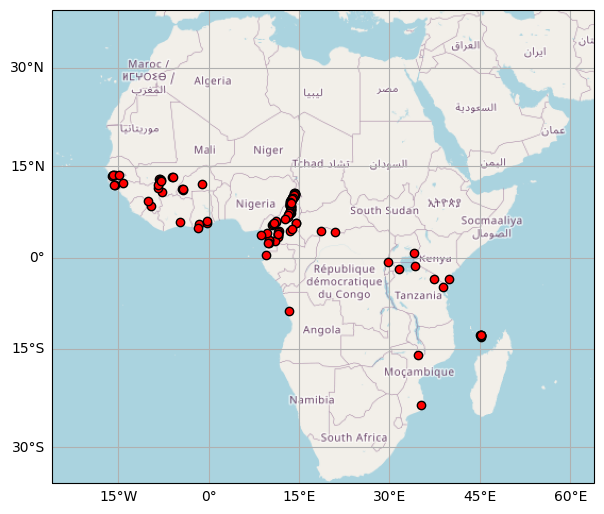

In [ ]:
plot_sites(background='osm', bgzoom=3);

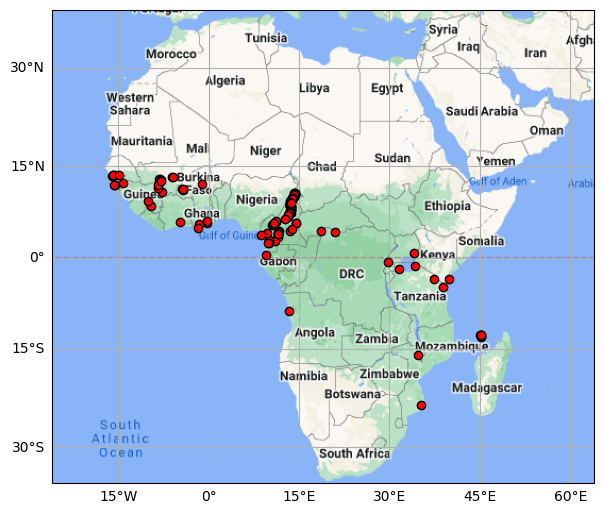

In [ ]:
plot_sites(background='google', bgzoom=3, bgstyle='street');

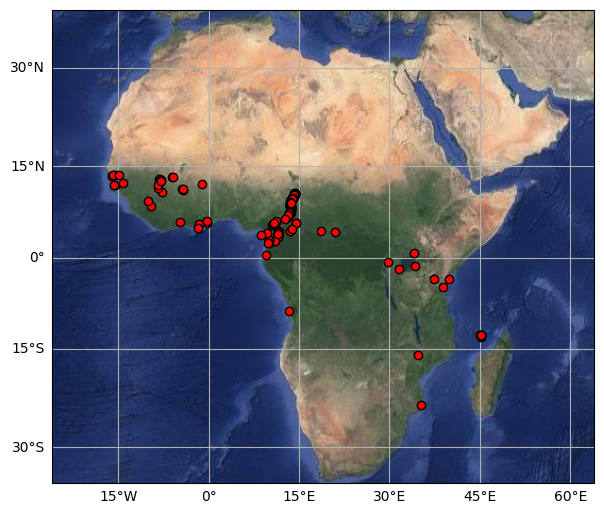

In [ ]:
plot_sites(background='google', bgzoom=3, bgstyle='satellite');

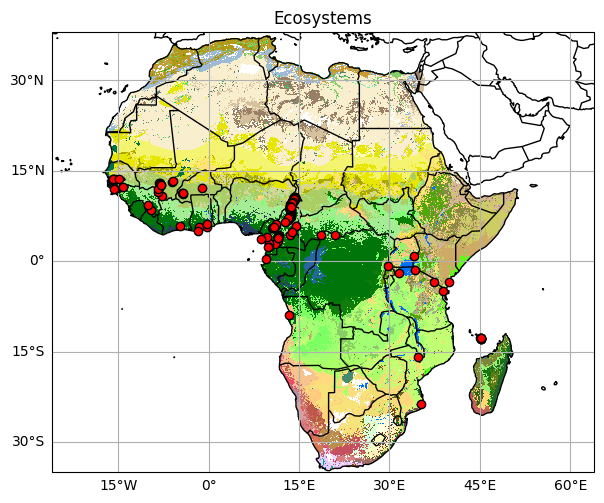

In [ ]:
plot_sites(background='ecosystems');

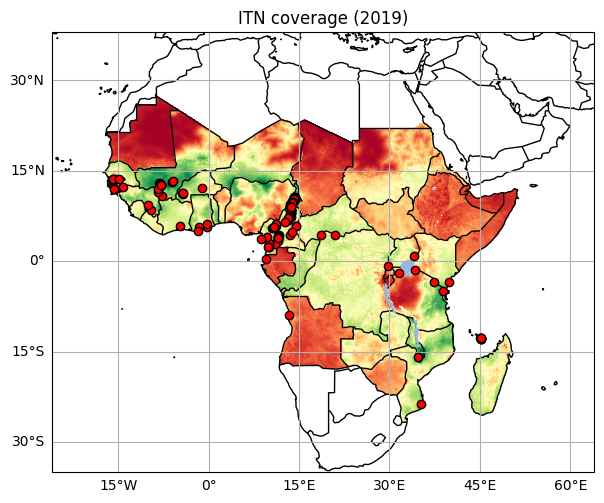

In [ ]:
plot_sites(background='itn_coverage', bgyear=2019);

In [ ]:
#Let’s add a function to make a multi-panel plot, so we can see some of these maps side-by-side.
def fig_sites(extent, sample_query, bgzoom=5, bgyear=2019, gridlines=None,
              label_sites=True, figsize=(13, 6)):
    """Make a multi-panel figure of collection sites with different map backgrounds."""

    fig = plt.figure(figsize=figsize, facecolor='w')
    kwargs = dict(
        extent=extent,
        sample_query=sample_query,
        gridlines=gridlines,
        label_sites=label_sites,
    )
    ax = fig.add_subplot(1, 3, 1, projection=crs_mercator)
    plot_sites(background='google', bgzoom=bgzoom, ax=ax, **kwargs)
    ax = fig.add_subplot(1, 3, 2, projection=crs_lonlat)
    plot_sites(background='ecosystems', ax=ax, **kwargs)
    ax = fig.add_subplot(1, 3, 3, projection=crs_lonlat)
    df_summary = plot_sites(background='itn_coverage', bgyear=bgyear, ax=ax, **kwargs)
    return df_summary

*   Now let’s zoom into some of the different collection sites,
*   lest look the sites of **Tanzania**
*    code for this figure more collections sites in different countries [**here**](https://malariagen.github.io/vector-data/ag3/examples/collection-sites.html#tanzania)

**Tanzania**


n_samples
sample_set location longitude latitude year taxon                
AG1000G-TZ Moshi    37.308    -3.482   2012 arabiensis         40
           Muheza   38.948    -4.940   2013 arabiensis          1
                                            gambiae            32
                                            gcx3               10
           Muleba   31.621    -1.962   2015 arabiensis        137
                                            gambiae            32
                                            gcx3                1
           Tarime   34.199    -1.431   2012 arabiensis         47

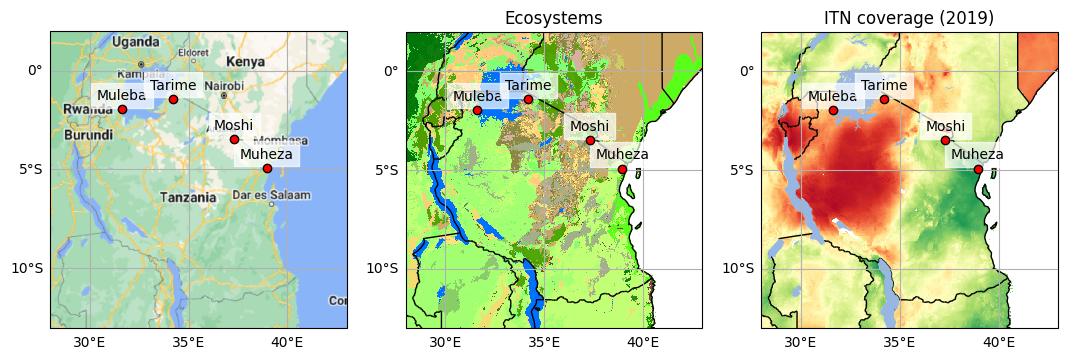

In [ ]:
fig_sites(
    extent=(28, 43, -13, 2),
    sample_query='country == "Tanzania"',
    bgzoom=5,
    gridlines=5,
)

**Mozambique**

n_samples
sample_set location longitude latitude year taxon             
AG1000G-MZ Furvela  35.299    -23.716  2003 gambiae          3
                                       2004 gambiae         71

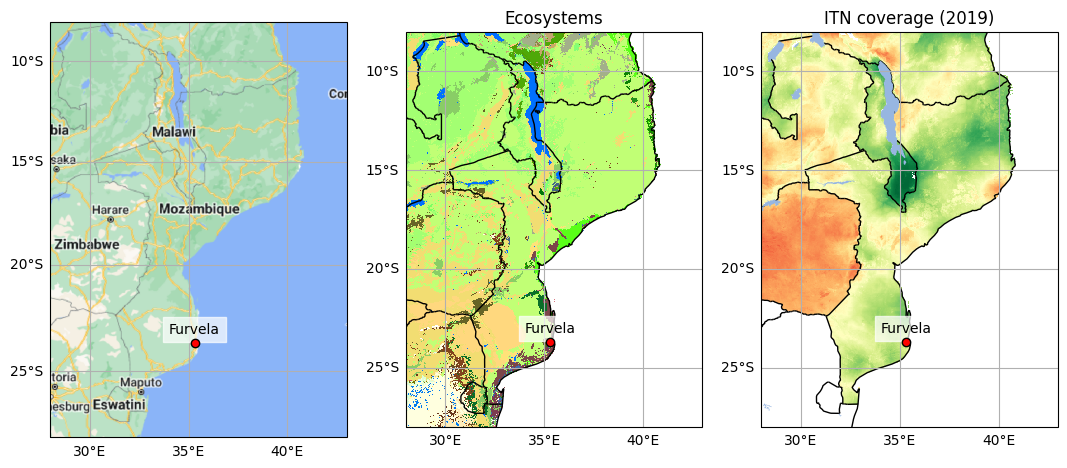

In [ ]:
fig_sites(
    extent=(28, 43, -28, -8),
    sample_query='country == "Mozambique"',
    bgzoom=5,
    gridlines=5,
)

*   Our Gambiae samples come from Muheza and Muleba, in the East and West of the country respectively.
*   We might conclude that our two clusters of “gambiae” in our PCA are being driven simply by the geographic distance separating the sample sites.
*   Arabiensis have also been collected from sites on either side of the country, and yet all these “arabiensis” samples cluster together.

*   An. arabiensis has a higher aridity tolerance than An. gambiae [2005](https://www.researchgate.net/publication/7592284_Physiology_of_desiccation_resistance_in_Anopheles_gambiae_and_Anopheles_arabiensis) and [2020](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7673128/pdf/41598_2020_Article_76248.pdf)
*   One explanation of our results, consistent with these other findings, is that as Muheza and Muleba are separated by a brown (more arid) region that runs approximately North to South, splitting the country in two.
*   The two “gambiae” populations are thus separated by a barrier of unsuitable environment, enabling the evolution of structure (two clusters in our PCA).
*   As An. arabiensis can tolerate the dryer region, geneflow can occur across the country resulting in less within-species structure (one cluster in our PCA).





In [ ]:
#Colour by AIM fraction
ag3.plot_pca_coords_3d(
    pca_df,
    x="PC1",
    y="PC2",
    z="PC3",
    color="aim_species_fraction_colu"
)

When we colour the points by fraction coluzzii ancestry we can see that the “gambiae” samples which cluster with the “intermediate_gambiae_coluzzii” actually have relatively high “coluzzii” ancestry (lighter purple) compared with the other “gambiae” (darker purple) in Tanzania.

This means that although they had been provisionally labelled as “gambiae” they were at the lower end of the AIM % cut-off.

As mentioned earlier, the AIMs are not 100% informative, and the species cut-offs we use are somewhat arbitrary. This is why we just use the AIM analyses to give provisonal species calls, and then follow up with PCA to give us a more nuanced picture of both structure and taxa.

**Labelling cryptic taxa**

With the evidence we have collected on this “intermediate_gambiae_coluzzii” cluster of samples in Tanzania, we would re-label these samples as members of a cryptic taxa.

In the sample metadata, the taxon column for these samples has consequently been changed to “gcx3”. This stands for “gambiae complex cryptic taxa 3”, as it is actually the third cryptic taxon we have identified in the Ag3.0 samples.

In [ ]:
#re-labelling if we run the same PCA but colour our samples by “taxon”.
ag3.plot_pca_coords_3d(pca_df, x="PC1", y="PC2", z="PC3", color="taxon")

In [ ]:
#there are some samples labelled as either “gambiae” or “intermediate_gambiae_coluzzii” in the aim_species column, which get assigned as “gcx3” in the taxon column.
sample_meta_df.query("sample_set == 'AG1000G-TZ'").groupby(["aim_species", "taxon"]).size()


aim_species                    taxon     
arabiensis                     arabiensis    225
gambiae                        gambiae        64
                               gcx3            4
intermediate_gambiae_coluzzii  gcx3            7
dtype: int64

**The importance of identifying cryptic taxa**

Our principal component analysis has highlighted population structure that appears to be due to a previously-unknown cryptic species in Tanzania.

*Can we use our genomic data to identify operationally important differences with this taxa?*

If we remember module 4 of the first workshop, we used the malariagen_data package **to plot gene SNP allele frequencies by cohorts**, as a heatmap. Let’s do that for the Vgsc gene (target of pyrethroid insecticides) in our Tanzanian “gambiae” and “gcx3” cohorts.

In [ ]:
ag3.aa_allele_frequencies?

In [ ]:
aa_allele_freqs_df = ag3.aa_allele_frequencies(
    transcript="AGAP004707-RD",
    cohorts="admin1_year",
    sample_sets="AG1000G-TZ",
    sample_query="taxon != 'arabiensis'",
)

Load SNP genotypes:   0%|          | 0/16 [00:00<?, ?it/s]

Compute allele frequencies:   0%|          | 0/4 [00:00<?, ?it/s]

Compute SNP effects:   0%|          | 0/5967 [00:00<?, ?it/s]

In [ ]:
aa_filt_df = aa_allele_freqs_df.query("max_af > 0.05")

In [ ]:
ag3.plot_frequencies_heatmap(aa_filt_df)